In [114]:
plt.style.use('ncr-paper.mplstyle')

In [115]:
import sys
sys.path.insert(0,'../../../')

In [116]:
import pyathena as pa

In [117]:
from pyathena.tigress_ncr.ncr_paper_lowz import LowZData

In [118]:
pdata = LowZData()

LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rst files not found in /scratch/gpfs/changgoo/TIGRESS-NCR/R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0.
LoadSimTIGRESSNCR-WARNING: rs

R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0
R8-S30 R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b10 R8_8pc_NCR.full.b10.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg1.Zd1.xy2048.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.3.Zd0.3.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy4096.eps0.0
R8-b1 R8_8pc_NCR.full.b1.v3.iCR4.Zg0.1.Zd0.025.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg1.Zd1.xy4096.eps0.0
LGR8-S05 LGR8_8pc_NCR_S05.full.b10.v3.iCR5.Zg0.1.Zd0.1.xy8192.eps0.0
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR5.Zg1.Zd1.xy1024.eps1.e-8.rstZ01
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps1.e-8
LGR4-S100 LGR4_4pc_NCR_S100.full.b1.v3.iCR4.Zg0.1.Zd0.1.xy2048.eps1.e-8
LGR4-b10 LGR4_4pc_NCR.full.b10.v3.iCR4.Zg1.Zd1.xy10

In [119]:
from pyathena.tigress_ncr.construct_time_series import athena_data

In [120]:
s = pdata.sa.set_model(pdata.mlist[0])

In [121]:
pdf = s.get_merge_jointpdfs(xHI=True)

In [132]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def plot_pdf(pdf,logTc=3,logTw=3.5):
    fig,axes = plt.subplots(2,2,figsize=(8,8),sharex='col',sharey='row',
                            gridspec_kw=dict(width_ratios=[1,0.5],height_ratios=[0.5,1]))

    axes[0,1].axis('off')

    plt.sca(axes[1,0])
    im = plt.pcolormesh(pdf.T_bin,pdf.xHI_bin,pdf['CII'].mean(dim='time'),norm=LogNorm(1.e-28,1.e-18))

    plt.xlim(1,5)
    plt.axhline(0.1,ls='--',color='r')
    plt.axhline(0.9,ls='--',color='r')
    plt.axvline(logTc,ls='--',color='b')
    plt.axvline(logTw,ls='--',color='b')
    plt.xlabel(r'$\log T$')
    plt.ylabel(r'$x_{HI}$')

    plt.sca(axes[0,0])
    plot_pdf_xHI(pdf)
    plt.legend(fontsize='xx-small',loc=2,bbox_to_anchor=(1,1))
    # plt.xlabel(r'$\log T$')
    plt.xlabel('')
    plt.ylabel(r'$L_{[CII]}$')

    plt.sca(axes[1,1])
    plot_pdf_T(pdf,logTc=3,logTw=3.5)
    # plt.ylabel(r'$x_{HI}$')
    plt.xlabel(r'$L_{[CII]}$')
    plt.legend(fontsize='xx-small',loc=4,bbox_to_anchor=(1,1))
    
def plot_pdf_xHI(pdf):
    dx = (pdf.xHI_bin[1]-pdf.xHI_bin[0]).data
    dy = (pdf.T_bin[1]-pdf.T_bin[0]).data
    (pdf['CII'].sum(dim='xHI_bin')*dx).mean(dim='time').plot(color='k',label='total',lw=5,alpha=0.5)
    (pdf['CII'].sel(xHI_bin=slice(0,0.1)).sum(dim='xHI_bin')*dx).mean(dim='time').plot(label=r'ionized (xHI<0.1)')
    (pdf['CII'].sel(xHI_bin=slice(0.1,0.9)).sum(dim='xHI_bin')*dx).mean(dim='time').plot(label=r'0.1<xHI<0.9')
    (pdf['CII'].sel(xHI_bin=slice(0.9,1)).sum(dim='xHI_bin')*dx).mean(dim='time').plot(label=r'atomic (xHI>0.9)')

    plt.yscale('log')
    plt.xlim(1,5)
    plt.ylim(1.e-28,1.e-18)

def plot_pdf_T(pdf, logTc=3, logTw=3.5):
    dx = (pdf.xHI_bin[1]-pdf.xHI_bin[0]).data
    dy = (pdf.T_bin[1]-pdf.T_bin[0]).data
    x = pdf.xHI_bin
    y = (pdf['CII'].sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,color='k',label='total',lw=5,alpha=0.5)
    y = (pdf['CII'].sel(T_bin=slice(0,logTc)).sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,label=f'Cold (log T<{logTc})')
    y = (pdf['CII'].sel(T_bin=slice(logTc,logTw)).sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,label=f'{logTc}<log T<{logTw}')
    y = (pdf['CII'].sel(T_bin=slice(logTw,5)).sum(dim='T_bin')*dy).mean(dim='time')
    plt.plot(y,x,label=f'Warm (log T>{logTw})')

    plt.xscale('log')
    plt.ylim(0,1)
    plt.xlim(1.e-28,1.e-18)    

/tmp/ipykernel_799243/4202791251.py:10: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = plt.pcolormesh(pdf.T_bin,pdf.xHI_bin,pdf['CII'].mean(dim='time'),norm=LogNorm(1.e-28,1.e-18))


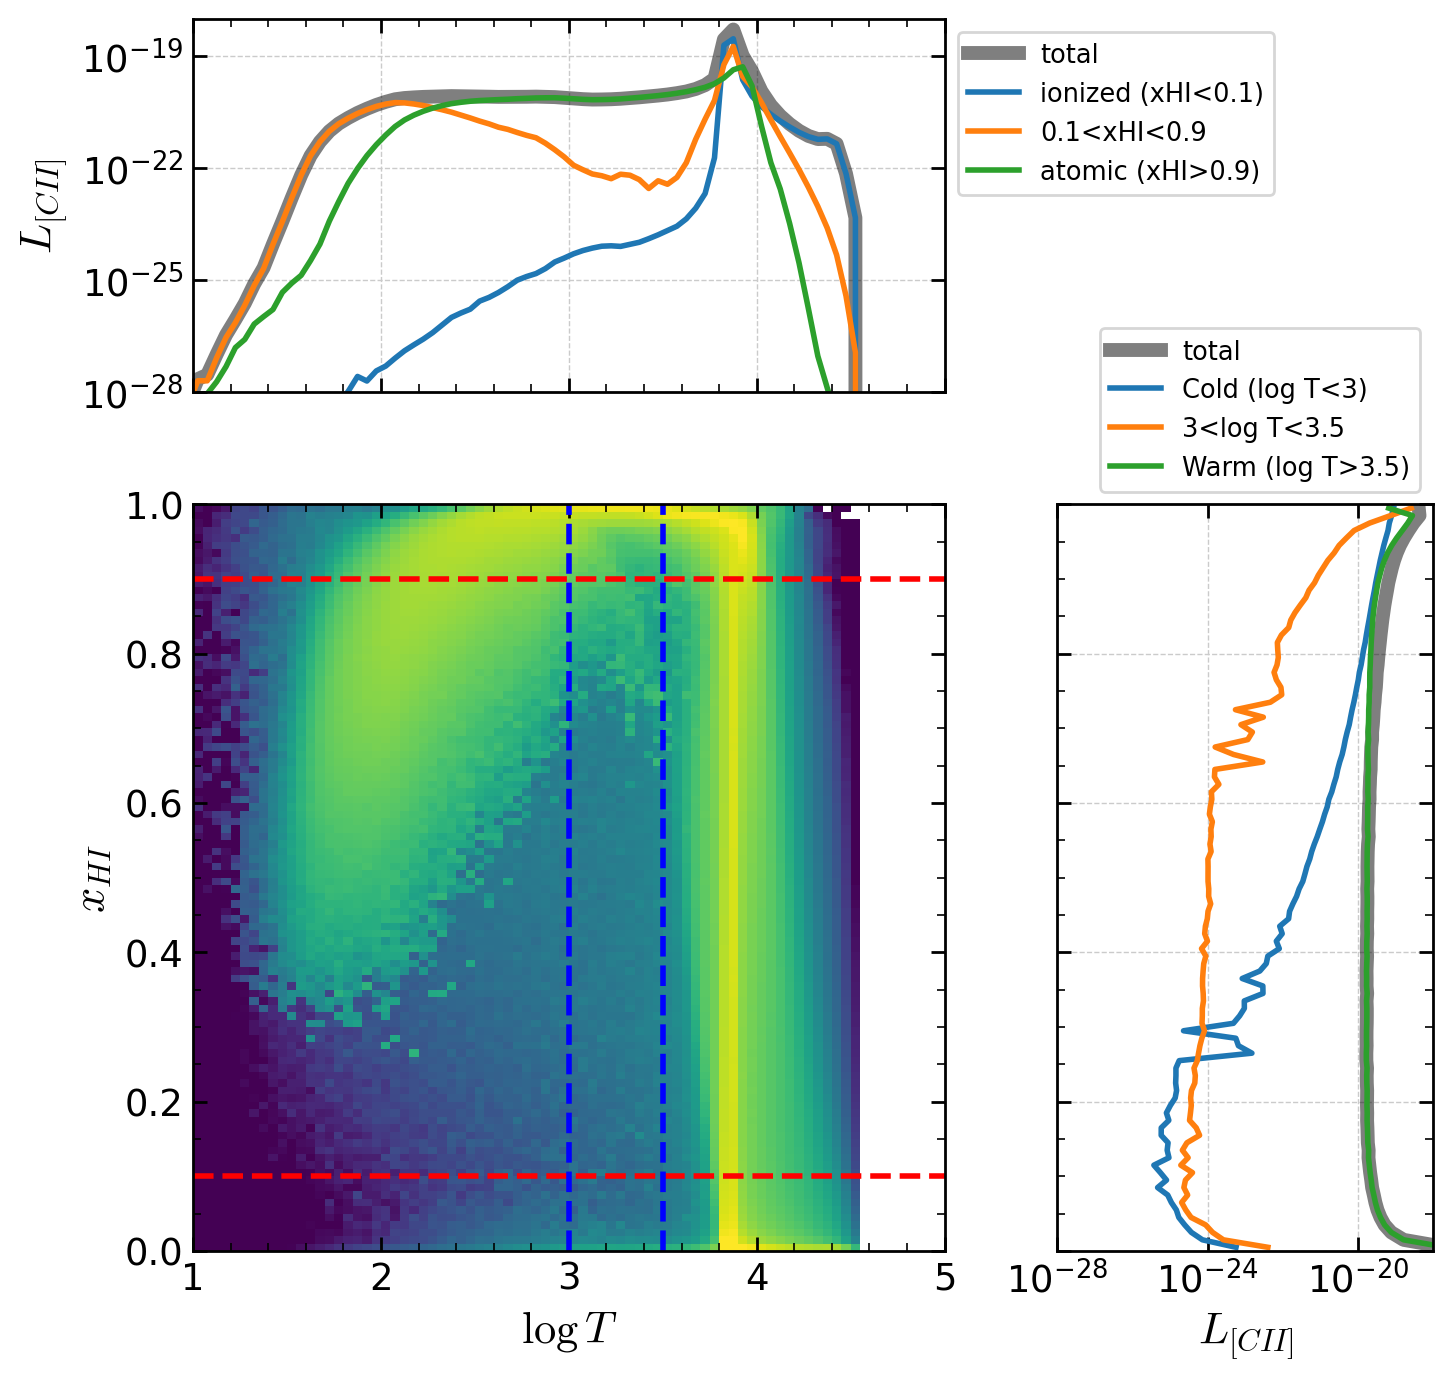

In [133]:
plot_pdf(pdf)

In [151]:
def get_phase_separated_CII(pdf, logTc=3, logTw=3.5):
    LCII = xr.Dataset()
    dx = (pdf.xHI_bin[1]-pdf.xHI_bin[0]).data
    dy = (pdf.T_bin[1]-pdf.T_bin[0]).data
    # LCII['total'] = pdf['CII'].sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['WIM'] = pdf.sel(xHI_bin=slice(0,0.1),T_bin=slice(logTc,5)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['WpIM'] = pdf.sel(xHI_bin=slice(0.1,0.9),T_bin=slice(logTc,5)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['WNM'] = pdf.sel(xHI_bin=slice(0.9,1.0),T_bin=slice(logTw,5)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['UNM'] = pdf.sel(xHI_bin=slice(0.9,1.0),T_bin=slice(logTc,logTw)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['CNM'] = pdf.sel(xHI_bin=slice(0.5,1.0),T_bin=slice(0,logTc)).sum(dim=['xHI_bin','T_bin'])*dx*dy
    LCII['CMM'] = pdf.sel(xHI_bin=slice(0,0.5),T_bin=slice(0,logTc)).sum(dim=['xHI_bin','T_bin'])*dx*dy

    return LCII.to_array('phase')

In [138]:
LCII = get_phase_separated_CII(pdf)

(0.01, 1)

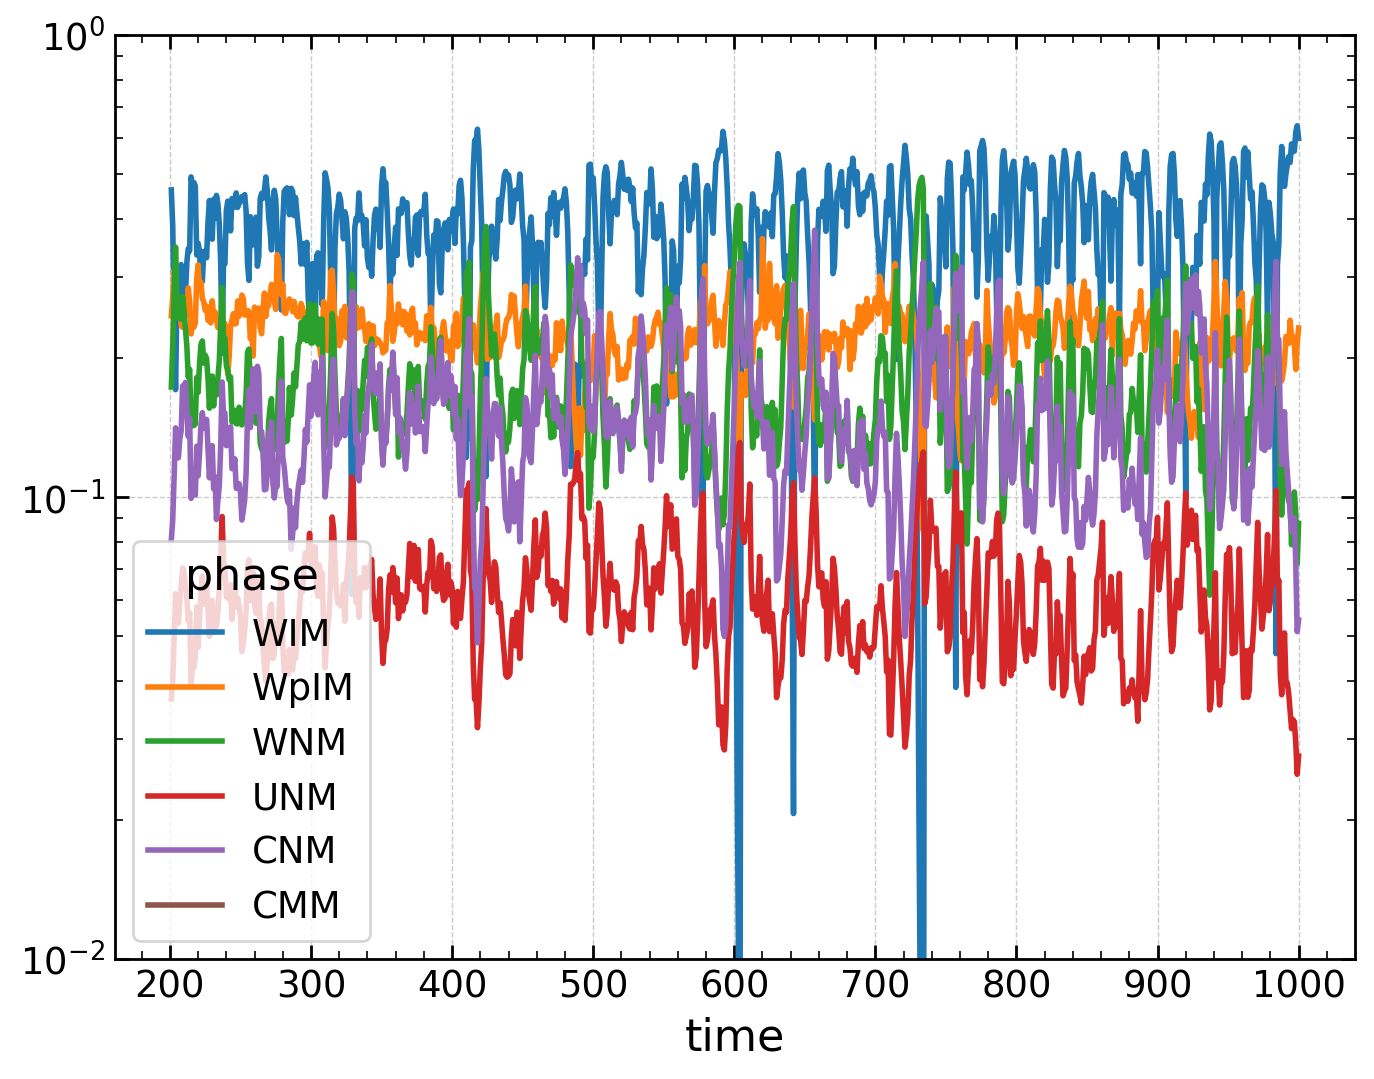

In [139]:
(LCII/LCII.sum(dim='phase')).plot(hue='phase')
plt.yscale('log')
plt.ylim(1.e-2,1)
# plt.ylim(1.e-25,1.e-18)


In [146]:
outdir, = glob.glob(os.path.join(s.savdir,'jointpdf_*'))

In [150]:
for m in pdata.mlist:
    print(m)
    s = pdata.sa.set_model(m)
    pdf = s.get_merge_jointpdfs(xHI=True)['CII']
    LCII = get_phase_separated_CII(pdf)
    outdir, = glob.glob(os.path.join(s.savdir,'jointpdf_*'))
    LCII.to_netcdf(os.path.join(outdir,'LCII.nc'))

R8_8pc_NCR_S30.full.b1.v3.iCR4.Zg1.Zd1.xy1024.eps0.0


KeyError: 'CII'

In [10]:
s = pdata.sa.set_model(pdata.mlist[0])
allslc_files = sorted(
    glob.glob(os.path.join(s.basedir, "allslc", "allslc_*.p"))
)
slcnums = [int(os.path.basename(f)[-6:-2]) for f in allslc_files]
fields = [
    "density",
    "pressure",
    "temperature",
    "rad_energy_density_PH",
    "rad_energy_density_LW",
    "rad_energy_density_PE",
    "rad_energy_density_LW_diss",
    "CR_ionization_rate",
    "cool_rate",
    "heat_rate",
    "xHI",
    "xH2",
    "xHII",
    "xe",
    "velocity1",
    "velocity2",
    "velocity3"
]
s.slc = s.read_slc_time_series(
    nums=slcnums, fields=fields, sfr=True, radiation=True
)
s.data = athena_data(s, s.slc.sel(z=0))
s.data.update_cooling_heating()
s.data.assign_phase()

/home/changgoo/.conda/envs/pyathena-lem/lib/python3.9/site-packages/xarray/core/computation.py:771: RuntimeWarning: overflow encountered in power
  result_data = func(*input_data)
/home/changgoo/pyathena/pyathena/microphysics/cool.py:358: RuntimeWarning: overflow encountered in exp
  k10e = fac * np.exp(lngamma10e) / g1CI_
/home/changgoo/pyathena/pyathena/microphysics/cool.py:359: RuntimeWarning: overflow encountered in exp
  k20e = fac * np.exp(lngamma20e) / g2CI_
/home/changgoo/pyathena/pyathena/microphysics/cool.py:360: RuntimeWarning: overflow encountered in exp
  k21e = fac * np.exp(lngamma21e) / g2CI_


xHI cut is 0.01
xHII cut is 0.01
xH2 cut is 0.01


In [17]:
for var in s.data.data_cool:
    if var.startswith('Lambda') or var.startswith('Gamma'): continue
    s.data.data_cool[f'Lambda_{var}'] = s.data.data_cool[var]/s.data['nH']**2
for var in s.data.data_heat:
    if var.startswith('Lambda') or var.startswith('Gamma'): continue
    s.data.data_heat[f'Gamma_{var}'] = s.data.data_heat[var]/s.data['nH']

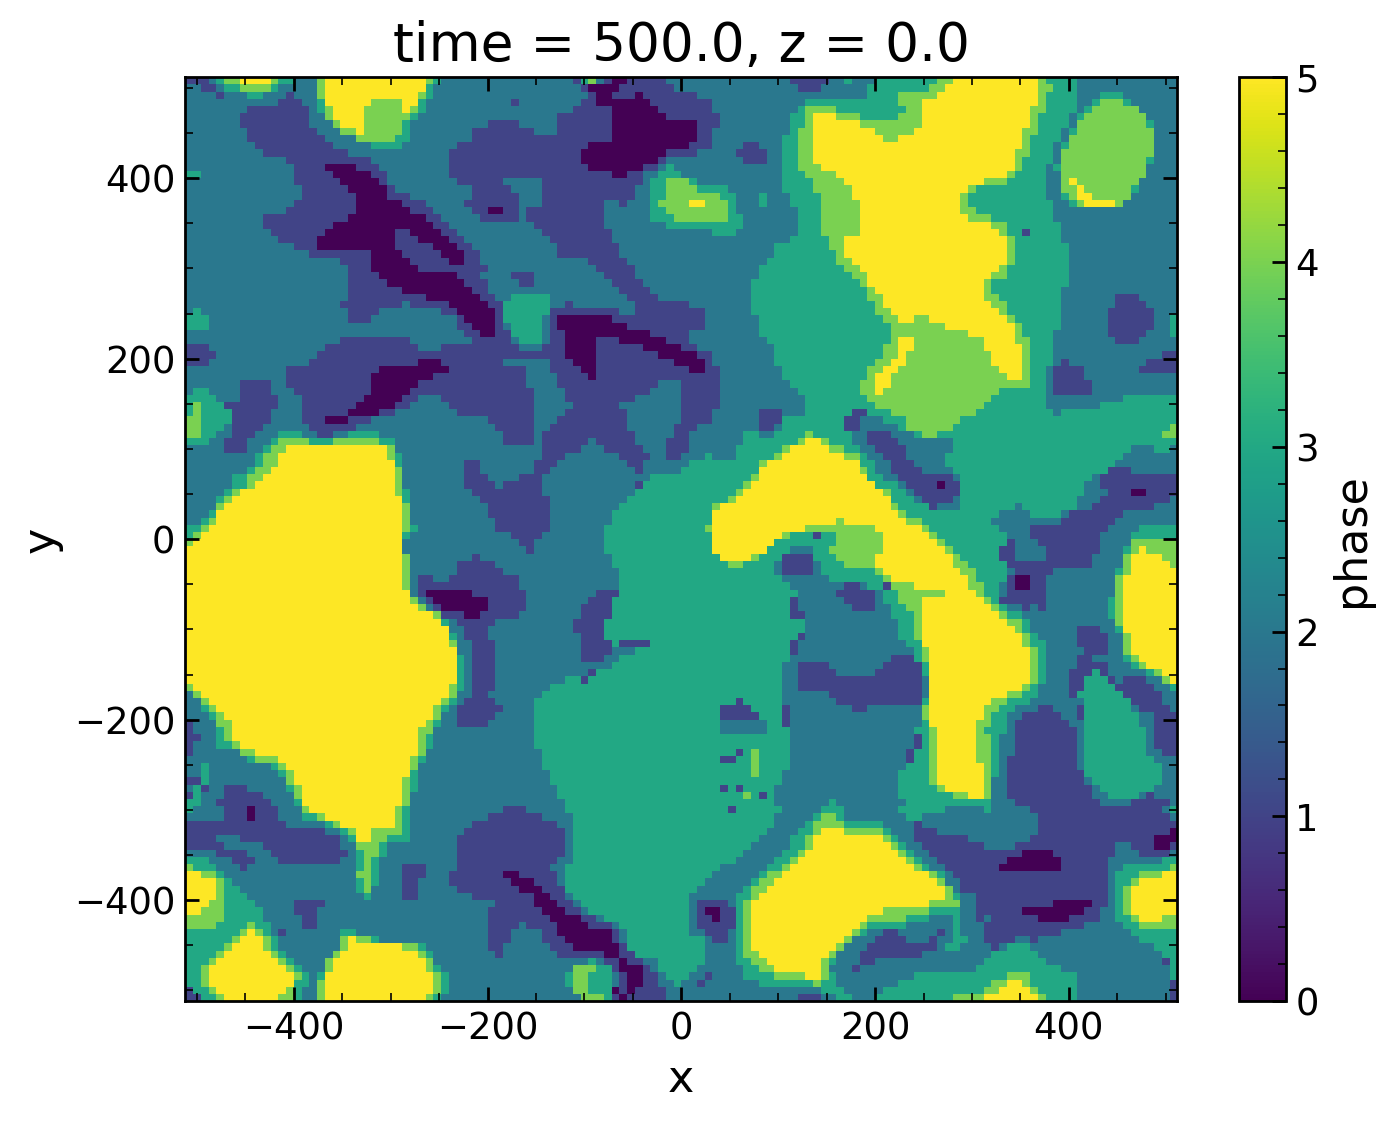

In [22]:
s.data.phase.sel(time=500,method='nearest').plot()

In [18]:
(s.data.data_heat['Gamma_CR']/s.data['xi_CR'])

<xarray.DataArray (time: 801, y: 128, x: 128)>
array([[[           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[3.79757072e-13, 1.04780239e-13, 5.75978610e-14, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.20553014e-13, 1.11640840e-13, 7.31640497e-14, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.70083416e-13, 1.22078021e-13, 1.00986331e-13, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
...
        [2.82170994e-11, 2.69314701e-11, 3.62700187e-11, ...,
         3.75286717e-11, 2.02644170e-11, 1.73490224e-13],
        [3.81176031e-11, 2.80548542e-11, 2.69981338e-11, ...,
         2.89895892e-11, 3.51515246e-11, 3.51394715e-11],
        [1.87891249e-11, 3.80382777e-11, 2.62694060e-11, ...,
         2.98962734e-11, 2.89493366e-11, 3.05892227e-11]],

       [[0.00000000e+00, 1.89948372e-13, 2.67556621e-11, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.27883882e-13, 2.69475884e-11, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 1.03021866e-13, 3.49109183e-11, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [3.71856059e-11, 2.87477829e-11, 2.80808545e-11, ...,
         3.04758096e-11, 3.57018376e-11, 3.85933720e-11],
        [1.26757251e-11, 3.64660562e-11, 3.07964773e-11, ...,
         2.04540242e-13, 3.15196464e-13, 2.54332580e-12],
        [1.69860890e-14, 1.17282605e-12, 3.63022220e-11, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]])
Coordinates:
  * y        (y) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * x        (x) float64 -508.0 -500.0 -492.0 -484.0 ... 484.0 492.0 500.0 508.0
  * time     (time) float64 200.0 201.0 202.0 203.0 ... 997.0 998.0 999.0 1e+03
    z        float64 0.0

In [ ]:
s.data = athena_data(s, s.slc.sel(z=0))
s.data.update_cooling_heating()
s.data.assign_phase()